In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


# Take a look at the first image as an array

In [4]:
index = 10
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

# Take a look at the first image as a picture

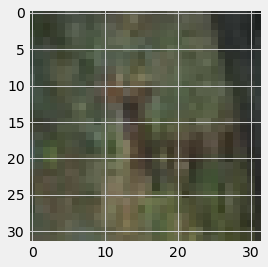

In [5]:
img = plt.imshow(x_train[index])

In [6]:
print(f"The label of the above image is : {y_train[index]}")

The label of the above image is : [4]


# Get the image classification

In [7]:
# 0	airplane
# 1	automobile
# 2	bird
# 3	cat
# 4	deer
# 5	dog
# 6	frog
# 7	horse
# 8	ship
# 9	truck

In [8]:
# Getting the classification
classification = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
# Printing the image class
print(f"The image class is : {classification[y_train[index][0]]}")

The image class is : deer


## Converting the labels to the set of 10 numbers to input into the neural networks

In [9]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

## Printing the labels

In [10]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


## Printing the new labels of the image above

In [11]:
print(f"The one hot label of above image is : {y_train_one_hot[index]}")

The one hot label of above image is : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Normalizing the pixels to the values between 0 & 1

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

## Creating the model architecture...

In [14]:
# Defining the model
model = Sequential()

# Adding the first convolutional layer
model.add( Conv2D(32, (5,5), activation = 'relu', input_shape=(32,32,3)) )

# Adding the first pooling layer
model.add( MaxPooling2D(pool_size = (2,2)) )

# Adding the second convolutional layer
model.add( Conv2D(32, (5,5), activation = 'relu') )

# Adding the second pooling layer
model.add( MaxPooling2D(pool_size = (2,2)) )

# Adding a flattening layer
model.add(Flatten())

# Adding the first dense layer of 1000 neurons
model.add(Dense(1000, activation = 'relu'))

# Adding a dropout layer
model.add(Dropout(0.5))

# Adding the second dense layer of 500 neurons
model.add(Dense(500, activation = 'relu'))

# Adding a dropout layer
model.add(Dropout(0.5))

# Adding the third dense layer of 250 neurons
model.add(Dense(250, activation = 'relu'))

# Creating the final output layer of 10 neurons
model.add(Dense(10, activation = 'softmax'))

## Compiling the  model...

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 130s 552ms/step - loss: 2.0241 - accuracy: 0.2297 - val_loss: 1.4759 - val_accuracy: 0.4575
Epoch 2/10
157/157 [==============================] - 91s 577ms/step - loss: 1.4699 - accuracy: 0.4594 - val_loss: 1.3192 - val_accuracy: 0.5202
Epoch 3/10
157/157 [==============================] - 126s 802ms/step - loss: 1.3103 - accuracy: 0.5285 - val_loss: 1.2141 - val_accuracy: 0.5675
Epoch 4/10
157/157 [==============================] - 107s 680ms/step - loss: 1.1952 - accuracy: 0.5736 - val_loss: 1.1362 - val_accuracy: 0.5921
Epoch 5/10
157/157 [==============================] - 149s 950ms/step - loss: 1.1381 - accuracy: 0.5980 - val_loss: 1.0711 - val_accuracy: 0.6163
Epoch 6/10
157/157 [==============================] - 93s 589ms/step - loss: 1.0382 - accuracy: 0.6317 - val_loss: 1.0401 - val_accuracy: 0.6407
Epoch 7/10
157/157 [==============================] - 96s 614ms/step - loss: 0.9711 - accuracy: 0.6551 - val_loss: 1.0203 - va

## Evaluating the model using the test dataset

In [17]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 9s 28ms/step - loss: 1.0101 - accuracy: 0.6571


0.6571000218391418

## Visualising the model's accuracy

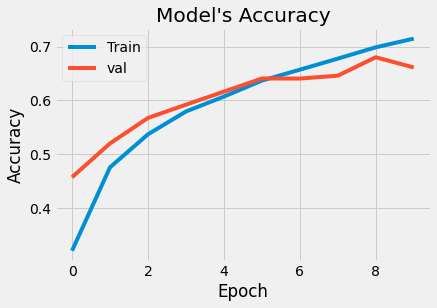

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model\'s Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

## Visualising the model's loss...

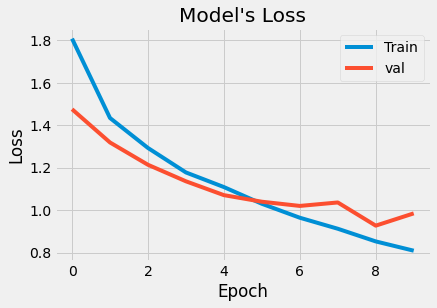

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model\'s Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'val'], loc='upper right')
plt.show()

## Testing the model with an example

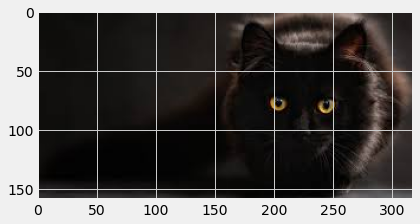

In [39]:
# Showing the image
new_img = plt.imread('Cat2.jpg')
img = plt.imshow(new_img)

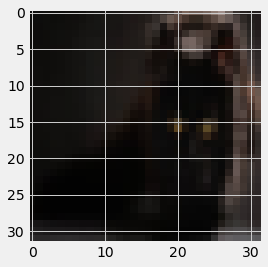

In [40]:
# Resizing the image
from skimage.transform import resize
resized_image = resize(new_img, (32, 32, 3))
img = plt.imshow(resized_image)

## Get the model's predictions...

In [41]:
preds = model.predict(np.array([resized_image]))
# Showing the predictions
preds

array([[0.00154087, 0.00062997, 0.16046505, 0.52163285, 0.06465077,
        0.17460665, 0.06661057, 0.00827687, 0.00082792, 0.00075849]],
      dtype=float32)

In [42]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = preds

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
            
# Showing the sorted labels in order
print(list_index)

[3, 5, 2, 6, 4, 7, 0, 8, 9, 1]


## Printing the first five predictions

In [43]:
for i in range(5):
    print(classification[list_index[i]], ':',round(preds[0][list_index[i]] * 100, 2), '%')

cat : 52.16 %
dog : 17.46 %
bird : 16.05 %
frog : 6.66 %
deer : 6.47 %


In [44]:
print(preds[0])

[0.00154087 0.00062997 0.16046505 0.52163285 0.06465077 0.17460665
 0.06661057 0.00827687 0.00082792 0.00075849]
